# Chapter 4: Logistic Regression

In [1]:
%reset
low_memory=False

import pandas as pd
import matplotlib.pyplot as plt
import imblearn

import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix
from imblearn.metrics import specificity_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## 4.1 Introduction & Motivation

We've seen what linear regression can do, and we've seen the power of polynomial regression. Now with Logistic regression we are starting to dip out toes in the wonderful world of classification. Instead of trying to predict a number we are now trying to predict a **label**.

## 4.2 Problem Setting

Today we will be working with the Pima Indians Diabetics dataset. In this dataset is information regarding a whole bunch of women older than 21 years old of Pima Indian origin. The goal is to try and predict which women have **diabetes** and which do not. This is represented by the 'Outcome' column, where 1 means the person has diabetes and 0 means she does not.

## 4.3 Model

First, let's have a look at the data.

In [3]:
df = pd.read_csv("Diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##### Question 1: Explore the data by creating a heatmap. Which variables would you use when trying to predict diabetes and why?

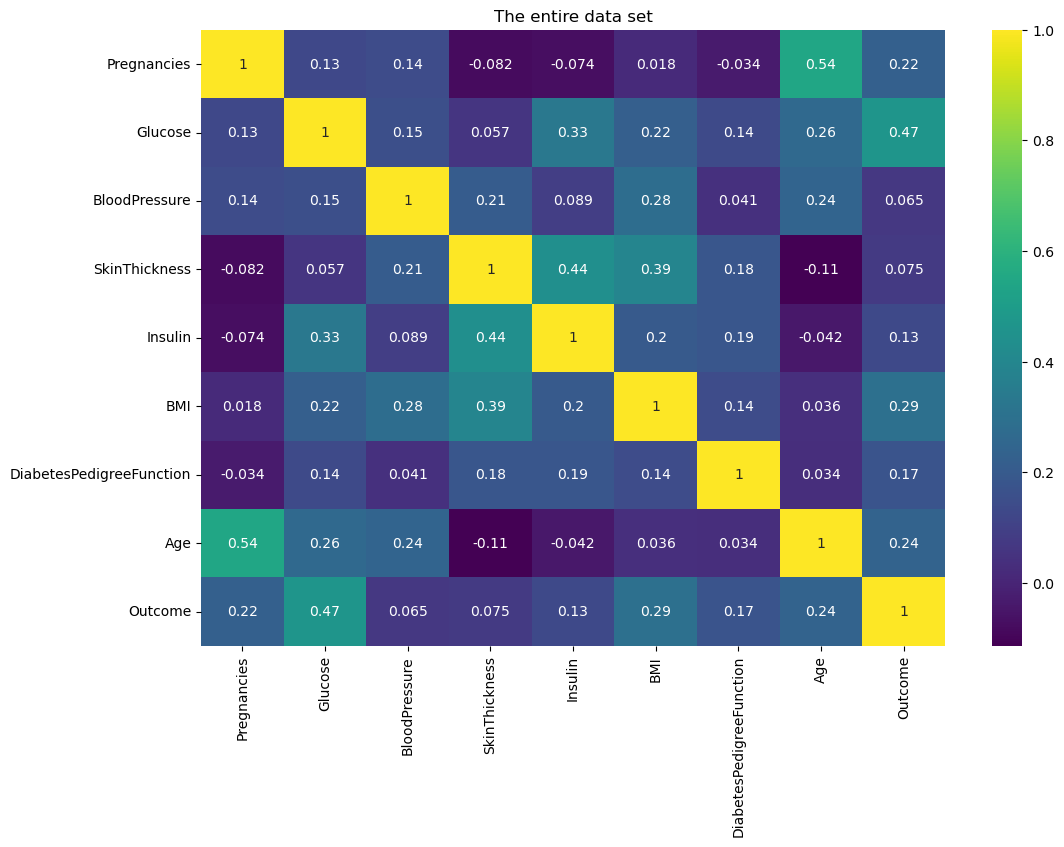

In [4]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.title("The entire data set")
plt.show()

##### Question 2: Create a train and test split of the data. Keep 30% of your data as testing data. Build your model using only the best parameter as found in question 1. For now, you can leave the solver at the default setting and keep the max_iter at 10000.

In [5]:
X = df[['Glucose', 'BMI', 'DiabetesPedigreeFunction']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)

logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

##### Question 3: A person has a glucose level of 125. Predict if this person has diabetes or not.

In [6]:
import numpy as np
import pandas as pd

mean_bmi = df['BMI'].mean()
mean_dpf = df['DiabetesPedigreeFunction'].mean()
new_sample = pd.DataFrame([[125, mean_bmi, mean_dpf]], columns=['Glucose', 'BMI', 'DiabetesPedigreeFunction'])

prediction = logisticRegr.predict(new_sample)
# print("The outcome is:", "Diabetes" if prediction[0] == 1 else "No Diabetes")
if prediction[0] == 1:
    print("Diabetes !oi mama ami to sash.")
else:
    print("No Diabetes! oi mama baca gaci.")

No Diabetes! oi mama baca gaci.


## 4.4 Model Evaluation

We have made our first prediction, but of course we don't know how well we can trust this yet. To know this, we first need to evaluate our model.

##### Question 4: Calculate all known classification metrics for your model. Are these values any good? Elaborate based on the formulas and meaning of the metrics.

In [14]:

y_pred = logisticRegr.predict(X_test)


accuracy = accuracy_score(y_test, y_pred) # accuracy score
precision = precision_score(y_test, y_pred) #precison score
recall = recall_score(y_test, y_pred) # recal 
f1 = f1_score(y_test, y_pred) # f1 score 
conf_matrix = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", conf_matrix)


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.70      0.53      0.60        74

    accuracy                           0.77       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.77      0.77      0.77       231

Confusion Matrix:
 [[140  17]
 [ 35  39]]
Accuracy: 0.77
Precision: 0.70
Recall: 0.53
F1 Score: 0.60


##### Question 5: Based on your findings, is this model any good? Would you prefer a high recall or specificity in this use case? Why?

1. Is the Model Any Good?
Accuracy: If the accuracy is high, it may suggest the model is generally performing well. However, if the dataset is imbalanced (e.g., fewer positive cases of diabetes), accuracy alone might be misleading.
Precision: A high precision indicates that when the model predicts a positive case (diabetes), it is often correct. This is important but not the most critical factor in diabetes prediction.
Recall (Sensitivity): This metric is crucial for predicting diabetes because it measures how many actual cases of diabetes the model correctly identifies. If the recall is low, it means the model is missing a significant number of diabetes cases, which is a critical problem.
F1 Score: If both precision and recall are reasonably high, the F1 score will also be high, indicating a good balance between false positives and false negatives.
2. High Recall vs. High Specificity:
Recall (Sensitivity): Measures how well the model identifies all the positive cases (those with diabetes). A high recall is essential when missing a diagnosis could lead to severe consequences for the patient. In the case of diabetes prediction, recall is often prioritized because we want to ensure that as many people with diabetes as possible are correctly identified, even if it means accepting some false positives.

# Specificity:
Measures how well the model identifies negative cases (those without diabetes). While it’s valuable to reduce false positives, missing a diabetes diagnosis (a false negative) can have much worse implications for a patient’s health. Therefore, specificity is generally less critical than recall in this scenario.

Conclusion
For diabetes prediction, a high recall is preferred. The model should aim to correctly identify as many cases of diabetes as possible, even if it means occasionally misclassifying someone without diabetes (false positive). Missing a diagnosis (false negative) can result in a lack of timely treatment, leading to severe complications. Thus, the focus should be on improving recall while balancing other metrics to achieve an effective and reliable model.

##### Question 6: Plot the confuson matrix. How can you visually confirm your previous findings?

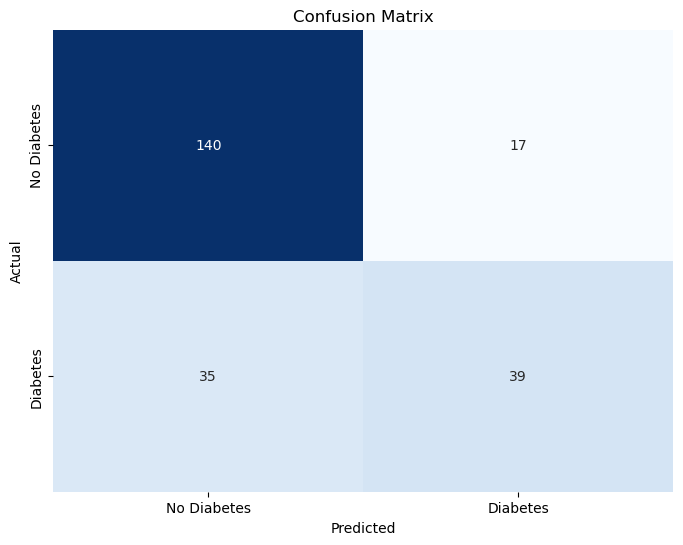

In [7]:
y_pred=logisticRegr.predict(X_test)
confi_matrix =confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(confi_matrix,annot =True,fmt='d',cmap='Blues',cbar=False, xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 4.5 Questions

##### Question 1: See section 4.3

##### Question 2: See section 4.3

##### Question 3: See section 4.3

##### Question 4: See section 4.4

##### Question 5: See section 4.4

##### Question 6: See section 4.4

##### Question 7: Play around with the different "solvers" (lbfgs, saga, newton-cg) and different levels of max_iteration. Which model results in the best accuracy?

In [13]:
max_iters =[10,100,1000,10000,100000,1000000]
solvers =['lbfgs','saga','newton-cg']
best_accuracy = 0
best_solver = None
best_max_iter = None

for max_iter in max_iters:
    for solver in solvers:
        logisticRegr = LogisticRegression(max_iter=max_iter,solver =solver)
        logisticRegr.fit(X_train, y_train)
        y_pred = logisticRegr.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Solver: {solver}, Max Iter: {max_iter}, Accuracy: {accuracy:.4f}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_solver = solver
            best_max_iter = max_iter
print("\n\nBest Configuration: ")
print(f"Solver: {best_solver}, Max Iter: {best_max_iter}, Accuracy: {best_accuracy:.4f}")

C:\Users\MOHAMMAD MIRAZ\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MOHAMMAD MIRAZ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MOHAMMAD MIRAZ\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:318: ConvergenceWarning: newton-cg failed to converge at loss = 0.5044794157949926. Increase the number of iterations.
  warnings.warn(
C:\Users\MOHAMMAD MIRAZ\anaconda3\Lib\site-packages\sklearn\linear_model\_sa

Solver: lbfgs, Max Iter: 10, Accuracy: 0.6797
Solver: saga, Max Iter: 10, Accuracy: 0.6883
Solver: newton-cg, Max Iter: 10, Accuracy: 0.7706
Solver: lbfgs, Max Iter: 100, Accuracy: 0.7749
Solver: saga, Max Iter: 100, Accuracy: 0.6926
Solver: newton-cg, Max Iter: 100, Accuracy: 0.7749
Solver: lbfgs, Max Iter: 1000, Accuracy: 0.7749
Solver: saga, Max Iter: 1000, Accuracy: 0.7359
Solver: newton-cg, Max Iter: 1000, Accuracy: 0.7749
Solver: lbfgs, Max Iter: 10000, Accuracy: 0.7749
Solver: saga, Max Iter: 10000, Accuracy: 0.7619
Solver: newton-cg, Max Iter: 10000, Accuracy: 0.7749
Solver: lbfgs, Max Iter: 100000, Accuracy: 0.7749
Solver: saga, Max Iter: 100000, Accuracy: 0.7619
Solver: newton-cg, Max Iter: 100000, Accuracy: 0.7749
Solver: lbfgs, Max Iter: 1000000, Accuracy: 0.7749
Solver: saga, Max Iter: 1000000, Accuracy: 0.7619
Solver: newton-cg, Max Iter: 1000000, Accuracy: 0.7749


Best Configuration: 
Solver: lbfgs, Max Iter: 100, Accuracy: 0.7749


##### Question 8: Go back to the correlation matrix we drew in section 4.3. Figure out which other features might be useful when predicting diabetes. Retrain your model and calculate all metrics. Play around with other possible features and create some new ones to try the interaction effect. What is the best model you can achieve?

In [14]:
selected_features = ['Glucose', 'BMI', 'Age', 'Insulin'] 
df['Glucose_BMI'] = df['Glucose'] *df['BMI']
df['Insulin_Glucose'] = df['Insulin'] * df['Glucose']
selected_features += ['Glucose_BMI', 'Insulin_Glucose']
X = df[selected_features]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

logisticRegr = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=0)
logisticRegr.fit(X_train, y_train)

y_pred = logisticRegr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.83       157
           1       0.67      0.49      0.56        74

    accuracy                           0.76       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.75      0.76      0.75       231

Confusion Matrix:
 [[139  18]
 [ 38  36]]
Accuracy: 0.7576
Precision: 0.6667
Recall: 0.4865
F1 Score: 0.5625


##### Question 9: Consider the person with values as described below. Using only the features you're using in your best model, does this person have diabetes or not?

| Pregnancies | Glucose | BloodPressure | SkinThickness | Insulin | BMI | DiabetesPedigreeFunction | Age |
| --- | --- |--- |--- |--- |--- |--- |--- |
| 8 | 190 | 92 | 41 | 33.6 | 39.3 | 0.278 | 52 |

In [17]:
new_data = pd.DataFrame({'Glucose': [190],'BMI': [39.3],'Age': [52],'Insulin': [33.6]})
new_data['Glucose_BMI'] = new_data['Glucose'] * new_data['BMI']
new_data['Insulin_Glucose'] = new_data['Insulin'] * new_data['Glucose']

prediction = logisticRegr.predict(new_data)
outcome = "Diabetes" if prediction[0] == 1 else "No Diabetes"
print("The outcome is:", outcome)
if outcome =="Diabetes":
    print("Oi mama na please" ,{prediction[0]})
else:
    print("Nice and attractive")

The outcome is: Diabetes
Oi mama na please {1}
